### Financial Engineering 
# Module Assignment - Part 1

<hr>

## Table of Contents
1. [Question 1](#q1)
2. [Question 2](#q2)
3. [Question 3](#q3)

In [1]:
# importing dependencies 
from scipy.stats import norm 

import pandas as pd
import fintech.prices as pr # for prices
import fintech.dataio as dtio # for data input & output
import fintech.finmodels as fmd # for financial models 
import fintech.constants as const # for constant values 
from IPython.display import display
from collections import OrderedDict

<a id="q1"></a>
## Question #1

The objective of this question is to analyse the data for different instruments, based on last year’s
data, and provide your opinion in terms of their respective risk and return. 

<b>(i)</b> Download daily closing price data for S&P 500, FTSE 100 and Gold (SPDR) for the years 2014 to 2017. 

In [2]:
# downloading closing prices for S&P500, FTSE100 and GOLD(SPDR)
data_path = "data/part_1/"

# defining tickers and filenames (filename,ticker)
sp_ticker = ("S&P500", "^GSPC")
ftse_ticker = ("FTSE100", "^FTSE?P=FTSE")
gld_ticker = ("GOLD", "GLD")

# date format '%Y-%m-%d' from 2014 to 2017
start_date = "2014-01-01"
end_date = "2018-01-01"

# download prices for tickers if they are not found in data path 
dtio.df2csv(data_path, sp_ticker[0], pr.download_prices, sp_ticker[1], start_date, end_date) # S&P500
dtio.df2csv(data_path, ftse_ticker[0], pr.download_prices, ftse_ticker[1], start_date, end_date) # FTSE100
dtio.df2csv(data_path, gld_ticker[0], pr.download_prices, gld_ticker[1], start_date, end_date) # GOLD(SPDR)

# importing prices from the specified tickers; from csv to pandas dataframe
# use OrderedDictionary to hold references 
prices_dict = OrderedDict()
prices_dict[sp_ticker[0]] = dtio.csv2df(data_path, sp_ticker[0])
prices_dict[ftse_ticker[0]] = dtio.csv2df(data_path, ftse_ticker[0])
prices_dict[gld_ticker[0]] = dtio.csv2df(data_path, gld_ticker[0])

# iterate in dictionary and show downloaded prices 
print("\n")
for key in prices_dict: 
    print("Ticker: {0} , Size: {1}".format(key , prices_dict[key].shape[0]))
    print(prices_dict[key].dtypes)
    display(prices_dict[key].head())
    display(prices_dict[key].tail())

File already found in path specified: data/part_1/S&P500.csv.
File already found in path specified: data/part_1/FTSE100.csv.
File already found in path specified: data/part_1/GOLD.csv.


Ticker: S&P500 , Size: 1008
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,1842.609985,1849.439941,1842.410034,1848.359985,1848.359985,2312840000
1,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
3,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
4,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000


,Date,Open,High,Low,Close,Adj Close,Volume
1003,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000
1004,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000
1005,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000
1006,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000
1007,2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000


Ticker: FTSE100 , Size: 1011
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,6749.100098,6759.399902,6707.500000,6717.899902,6717.899902,459529100
1,2014-01-03,6717.899902,6747.299805,6699.299805,6730.700195,6730.700195,374841500
2,2014-01-06,6730.700195,6752.000000,6714.600098,6730.700195,6730.700195,524387000
3,2014-01-07,6730.700195,6768.899902,6718.100098,6755.500000,6755.500000,672375600
4,2014-01-08,6755.500000,6755.500000,6713.399902,6721.799805,6721.799805,720025300


,Date,Open,High,Low,Close,Adj Close,Volume
1006,2017-12-21,7525.200195,7609.700195,7517.899902,7604.000000,7604.000000,621347000
1007,2017-12-22,7604.000000,7614.399902,7585.500000,7592.700195,7592.700195,243831300
1008,2017-12-27,7592.700195,7632.700195,7586.399902,7620.700195,7620.700195,458380900
1009,2017-12-28,7620.700195,7633.600098,7609.799805,7622.899902,7622.899902,311875400
1010,2017-12-29,7622.899902,7697.600098,7620.000000,7687.799805,7687.799805,289238900


Ticker: GOLD , Size: 1008
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,114.610001,117.129997,114.459999,116.120003,116.120003,12835900
1,2014-01-02,117.930000,118.730003,117.750000,118.000000,118.000000,7551000
2,2014-01-03,118.639999,119.620003,118.589996,119.290001,119.290001,5874400
3,2014-01-06,119.760002,120.389999,117.110001,119.500000,119.500000,10106500
4,2014-01-07,118.459999,118.919998,118.129997,118.820000,118.820000,6433700


,Date,Open,High,Low,Close,Adj Close,Volume
1003,2017-12-22,120.669998,121.139999,120.570000,120.940002,120.940002,5791300
1004,2017-12-26,121.550003,121.870003,121.510002,121.769997,121.769997,8224400
1005,2017-12-27,122.000000,122.339996,121.879997,122.230003,122.230003,6232700
1006,2017-12-28,122.820000,122.919998,122.559998,122.849998,122.849998,5732700
1007,2017-12-29,123.699997,124.089996,123.459999,123.650002,123.650002,7852100


<b>(ii)</b> Why log returns are normally preferred from standard arithmetic returns?

<b>(iii)</b> Identify the first 4 distribution moments for each index/product mentioned in part <b>(i)</b>. For your calculations utilise daily log returns. In your answer describe the calculations/steps performed.

In [3]:
# decimal places
ndigits = 6

# create a new OrderedDictionary for distribution moments
# as these will be utilised in future questions 
pricesdist_dict = OrderedDict()

# calculate daily log returns for tickers 
# output the 4 distribution moments 
# iterate in prices dictionary
for key in prices_dict: 
    # print key/ticker 
    print("Key: {0}".format(key))
    
    # calculate daily log returns 
    prices_dict[key][const.COL_LOG_RETURN] = pr.log_diff(dataframe=prices_dict[key], 
                                                         column=const.COL_ADJ_CLOSE, 
                                                         shift=1)
    
    # print rows count before dropping NaN 
    print("\tRows before dropping NaN: {0}".format(prices_dict[key].shape[0]))
    
    # drop NaN daily log returns 
    prices_dict[key] =  prices_dict[key].dropna() 
    
    # print rows count after dropping NaN 
    print("\tRows after dropping NaN: {0}".format(prices_dict[key].shape[0]))
    
    # calculate 4 distribution moments 
    dist_mean, dist_std, dist_skew, dist_kurtosis = fmd.dist_moments(prices_dict[key][const.COL_LOG_RETURN])
    
    # print 4 distribution moments
    print("\nDistribution Moments "+
          "\n\tMean (1st): {0}".format(round(dist_mean, ndigits)) +
          "\n\tSTD (2nd): {0}".format(round(dist_std, ndigits)) +
          "\n\tSkew (3rd): {0}".format(round(dist_skew, ndigits)) +
          "\n\tKurtosis (4th): {0}".format(round(dist_kurtosis, ndigits)) +
          "\n\n##########################################\n")
    
    # add to distribution moments dictionary 
    pricesdist_dict[key] = (dist_mean, dist_std, dist_skew, dist_kurtosis)

Key: S&P500
	Rows before dropping NaN: 1008
	Rows after dropping NaN: 1007

Distribution Moments 
	Mean (1st): 0.000367
	STD (2nd): 0.007621
	Skew (3rd): -0.409687
	Kurtosis (4th): 3.120574

##########################################

Key: FTSE100
	Rows before dropping NaN: 1011
	Rows after dropping NaN: 1010

Distribution Moments 
	Mean (1st): 0.000134
	STD (2nd): 0.008815
	Skew (3rd): -0.176003
	Kurtosis (4th): 2.722205

##########################################

Key: GOLD
	Rows before dropping NaN: 1008
	Rows after dropping NaN: 1007

Distribution Moments 
	Mean (1st): 6.2e-05
	STD (2nd): 0.008785
	Skew (3rd): 0.218914
	Kurtosis (4th): 2.279381

##########################################



<b>(iv)</b> Comment on the measured statistics from the perspective of risk and return. In your answer compare the results obtained.

<b>(v)</b> Annualize daily return (first moment) and volatility (second moment). In your scaling process assume 250 days for the year. In your answer describe the calculations/steps performed.

In [4]:
# annualizing daily returns and volatility for tickers 
# iterate in distribution moments dictionary
for key in pricesdist_dict: 
    # print key/ticker 
    print("Key: {0}".format(key))
    
    # get distribution moments for key 
    moments = pricesdist_dict[key]
    
    # calculate annualized return and volatility 
    annualized_return, annualized_volatility = fmd.annualized_retvol(first_mom=moments[0],
                                                                     second_mom=moments[1],
                                                                     year_days=const.YEAR_250)
    
    # print annualized return and volatility 
    print("\tAnnualized Returns: {0}%".format(round(annualized_return, 4)) +
          "\n\tAnnualized Volatility: {0}%".format(round(annualized_volatility, 4)) + 
          "\n\n##########################################\n")

Key: S&P500
	Annualized Returns: 9.1641%
	Annualized Volatility: 12.0506%

##########################################

Key: FTSE100
	Annualized Returns: 3.3381%
	Annualized Volatility: 13.9372%

##########################################

Key: GOLD
	Annualized Returns: 1.5599%
	Annualized Volatility: 13.8906%

##########################################



<b>(vi)</b> By considering the last closing price at the end of 2017, and the annualized volatility from question <b>(v)</b>, what would be the price level of S&P 500 after 1 month, that according to normal probability, there is a 32% chance that the actual price will be above it. Show your workings.

In [5]:
# show what the price would be after 1 month (S&P500)
# get the last closing price for S&P500
sp_last_close = prices_dict[sp_ticker[0]].tail(1)["Adj Close"].values[0]
print("Last closing price (S&P500) for 2017: ${0} ".format(round(sp_last_close, 2)))

# re-calculate annualized volatility for S&P500
sp_moments = pricesdist_dict[sp_ticker[0]]
sp_annual_vol = fmd.annualized_retvol(first_mom=sp_moments[0],
                                               second_mom=sp_moments[1],
                                               year_days=const.YEAR_250)[1]

# print annualized volatility for S&P500
print("Annualized Volatility (S&P500): {0}%".format(round(sp_annual_vol, 4)))

# calculate price deviation for the next month 
sp_deviation = sp_last_close * (sp_annual_vol/100) * ((const.MONTH_20/const.YEAR_250) ** 0.5)

# calculate the price level/range
sp_low = round((sp_last_close - sp_deviation), 2)
sp_high = round((sp_last_close + sp_deviation), 2)
print("Price levels after one month: ${0} - ${1}".format(sp_low, sp_high))

## TODO -> ASK VINCE IF I UNDERSTOOD THIS QUESTION CORRECTLY 
# show that according to normal probability 
# there is a 32% chance that it will be above it
sp_low_zscore = ((sp_low - sp_last_close) / sp_deviation)
sp_high_zscore = ((sp_high - sp_last_close) / sp_deviation)
sp_prob_low = round(norm.cdf(x = sp_low_zscore, loc=0, scale = 1) * 100) # mean=0,std=1 
sp_prob_high = 100 - round(norm.cdf(x = sp_high_zscore, loc=0, scale = 1) * 100) # mean=0,std=1 

print("\nThe prob of the actual price being below ${0} is {1}%".format(sp_low, sp_prob_low)+ 
      "\nThe prob of the actual price being above ${0} is {1}%".format(sp_high, sp_prob_high)+
      "\nThe prob of the actual price being above or below the ranges of ${0} - ${1} is {2}%"
      .format(sp_low, sp_high, (sp_prob_low + sp_prob_high)))

Last closing price (S&P500) for 2017: $2673.61 
Annualized Volatility (S&P500): 12.0506%
Price levels after one month: $2582.48 - $2764.74

The prob of the actual price being below $2582.48 is 16.0%
The prob of the actual price being above $2764.74 is 16.0%
The prob of the actual price being above or below the ranges of $2582.48 - $2764.74 is 32.0%


<b>(vii)</b> Download the Google and Amazon daily prices for the last 5 years (till 31/12/2017). By utilizing a regression model, perform the Beta-test against the S&P 500 index. Comment on your findings.

In [6]:
# defining tickers and filenames (filename,ticker)
goog_ticker = ("GOOGLE", "GOOG")
amzn_ticker = ("AMAZON", "AMZN")
spbeta_ticker = ("S&P500BETA", "^GSPC")

# date format '%Y-%m-%d' from 2012 to 2017 (5 years)
start_date = "2012-01-01"
end_date = "2017-12-31"

# download prices for tickers if they are not found in data path 
dtio.df2csv(data_path, goog_ticker[0], pr.download_prices, goog_ticker[1], start_date, end_date) # GOOGLE
dtio.df2csv(data_path, amzn_ticker[0], pr.download_prices, amzn_ticker[1], start_date, end_date) # AMAZON
dtio.df2csv(data_path, spbeta_ticker[0], pr.download_prices, spbeta_ticker[1], start_date, end_date) # S&P500

# use OrderedDictionary to hold references 
beta_dict = OrderedDict()

# importing prices from the specified tickers; from csv to pandas dataframe
beta_dict[goog_ticker[0]] = dtio.csv2df(data_path, goog_ticker[0])
beta_dict[amzn_ticker[0]] = dtio.csv2df(data_path, amzn_ticker[0])
beta_dict[spbeta_ticker[0]] = dtio.csv2df(data_path, spbeta_ticker[0])

# pandas dataframe for all closing prices 
beta_prices = pd.DataFrame(data=beta_dict[goog_ticker[0]][const.COL_DATE], columns=[const.COL_DATE])

# iterate in dictionary and show downloaded prices + concat all adj closing prices
print("\n")
for key in beta_dict: 
    print("Ticker: {0} , Size: {1}".format(key , beta_dict[key].shape[0]))
    
    # append closing prices for key
    beta_prices.insert(loc=beta_prices.shape[1],column=key, value=beta_dict[key][const.COL_ADJ_CLOSE])

# display head for beta prices
beta_prices = beta_prices.rename(columns = {"S&P500BETA":"S&P500"}) # rename column for S&P500
display(beta_prices.head()) # print head for closing prices
print("Closing Prices: Size: {0}".format(beta_prices.shape[0])) # print new closing prices size 

# compute the percentage change 
beta_prices = beta_prices.set_index(const.COL_DATE) # set date as index 
beta_prices = beta_prices.pct_change(1) # calculate percentage change 

# print rows count before dropping NaN 
print("Rows before dropping NaN: {0}".format(beta_prices.shape[0]))

# drop NaN perc change 
beta_prices =  beta_prices.dropna() 

# print rows count after dropping NaN 
print("Rows after dropping NaN: {0}".format(beta_prices.shape[0]))

# print head and tail for closing prices
display(beta_prices.head()) 
display(beta_prices.tail()) 

File already found in path specified: data/part_1/GOOGLE.csv.
File already found in path specified: data/part_1/AMAZON.csv.
File already found in path specified: data/part_1/S&P500BETA.csv.


Ticker: GOOGLE , Size: 1509
Ticker: AMAZON , Size: 1509
Ticker: S&P500BETA , Size: 1509


,Date,GOOGLE,AMAZON,S&P500
0,2012-01-03,330.555054,179.029999,1277.060059
1,2012-01-04,331.980774,177.509995,1277.300049
2,2012-01-05,327.375732,177.610001,1281.060059
3,2012-01-06,322.909790,182.610001,1277.810059
4,2012-01-09,309.218842,178.559998,1280.699951


Closing Prices: Size: 1509
Rows before dropping NaN: 1509
Rows after dropping NaN: 1508


,GOOGLE,AMAZON,S&P500
Date,,,
2012-01-04,0.004313,-0.008490,0.000188
2012-01-05,-0.013871,0.000563,0.002944
2012-01-06,-0.013642,0.028152,-0.002537
2012-01-09,-0.042399,-0.022178,0.002262
2012-01-10,0.001092,0.004368,0.008886


,GOOGLE,AMAZON,S&P500
Date,,,
2017-12-22,-0.003300,-0.005448,-0.000458
2017-12-26,-0.003188,0.007190,-0.001058
2017-12-27,-0.006974,0.004674,0.000791
2017-12-28,-0.001172,0.003248,0.001834
2017-12-29,-0.001660,-0.014021,-0.005183


GOOGLE against S&P500 Beta-test
Summary (OLS):                             OLS Regression Results                            
Dep. Variable:                 GOOGLE   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     688.8
Date:                Sun, 03 Feb 2019   Prob (F-statistic):          2.47e-125
Time:                        21:20:35   Log-Likelihood:                 4583.9
No. Observations:                1508   AIC:                            -9164.
Df Residuals:                    1506   BIC:                            -9153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

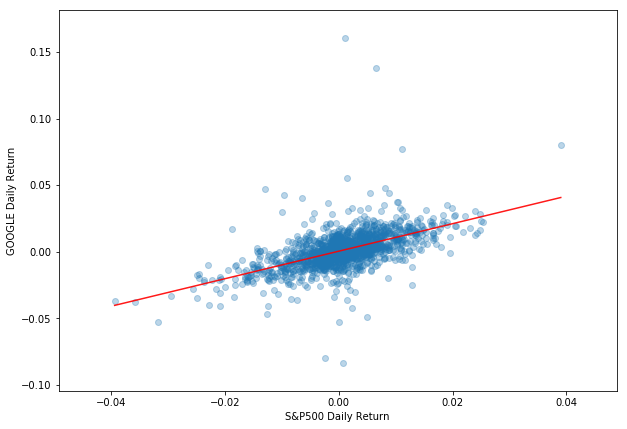

AMAZON against S&P500 Beta-test
Summary (OLS):                             OLS Regression Results                            
Dep. Variable:                 AMAZON   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     468.5
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.11e-90
Time:                        21:20:35   Log-Likelihood:                 4074.0
No. Observations:                1508   AIC:                            -8144.
Df Residuals:                    1506   BIC:                            -8133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

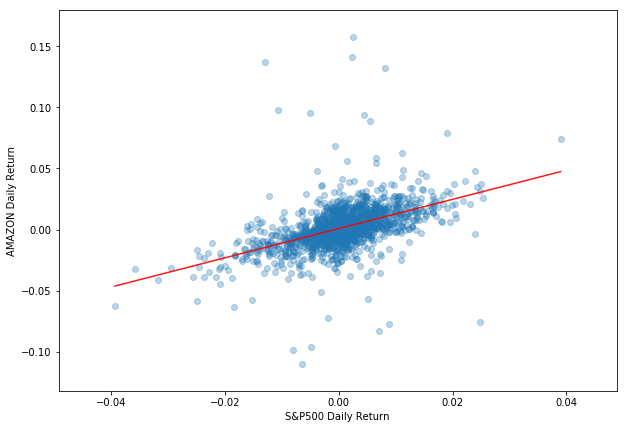

In [8]:
# now that we have the percentage changes (daily returns)
# utilise Linear Regression using OLS to perform Beta-Test 

# GOOGLE VS S&P500
fmd.beta_test_ols(x=beta_prices[sp_ticker[0]],
                  y=beta_prices[goog_ticker[0]],
                  x_label=sp_ticker[0],
                  y_label=goog_ticker[0])

# AMAZON VS S&P500
fmd.beta_test_ols(x=beta_prices[sp_ticker[0]],
                  y=beta_prices[amzn_ticker[0]],
                  x_label=sp_ticker[0],
                  y_label=amzn_ticker[0])

<a id="q2"></a>
## Question #2

Modern or mean-variance portfolio theory (MPT) is a major cornerstone of financial theory. Based on this theoretical breakthrough the Nobel Prize in Economics was awarded to its inventor, Harry Markowitz, in 1990. Using the data from Question 1, we need to investigate the right allocation across a portfolio made up of 3 investments, S&P 500, FTSE 100 and Gold (SPDR).